Loading C:\Project 2026\LSMS Project\LCMS\data\combined\inputs_none_all_batches_ZEROS.csv\inputs_none_all_batches_ZEROS.csv...
Processing 1512 samples with 6725 features...
Saved comparison plot to cleaning_comparison.png
Saved cleaned data to C:\Project 2026\LSMS Project\LCMS\data\inputs_classical_cleaned.csv


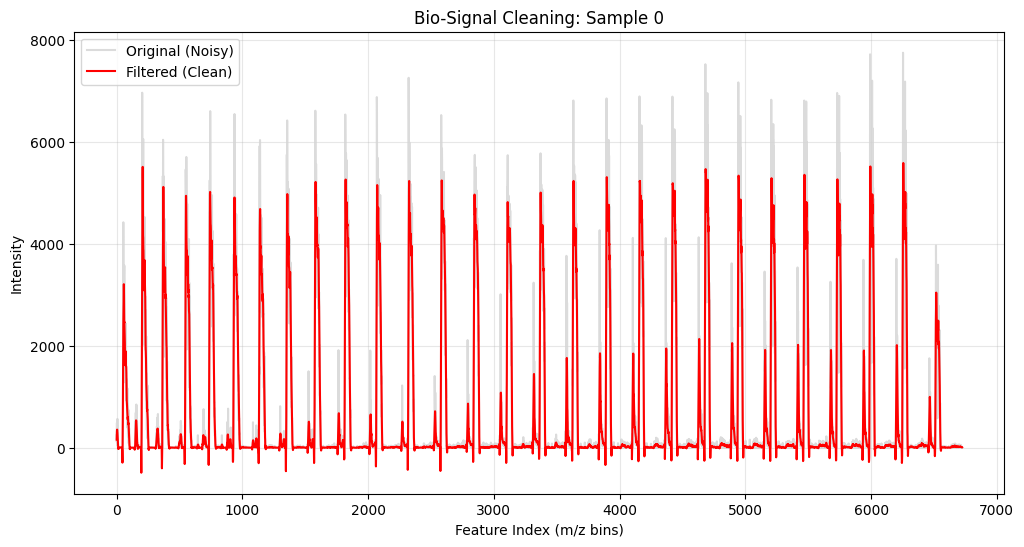

In [1]:
!pip install scipy
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter, butter, filtfilt
import matplotlib.pyplot as plt

def apply_classical_cleaning(input_file, output_file):
    # 1. Load your data (Skip the ID/Label columns for filtering)
    print(f"Loading {input_file}...")
    df = pd.read_csv(input_file)
    
    # Separate metadata (ID, Label, etc.) from the signal data
    # Assuming the signal columns start after 'batch' based on your CSV snippet
    signal_cols = [c for c in df.columns if c not in ['ID', 'label', 'batch', 'Unnamed: 0']]
    metadata = df[['ID', 'label', 'batch']]
    signals = df[signal_cols].values

    print(f"Processing {len(signals)} samples with {signals.shape[1]} features...")

    # 2. Apply the Filter (The "Lecture" Method)
    # We use Savitzky-Golay: It acts like a Lowpass filter but preserves peak height better
    # window_length: How wide the 'window' is (like the 'kernel' in CNNs)
    # polyorder: Complexity of the curve fitting (usually 2 or 3)
    cleaned_signals = savgol_filter(signals, window_length=15, polyorder=3, axis=1)

    # ALTERNATIVE: Standard Lowpass Filter (Butterworth) from lecture
    # b, a = butter(N=4, Wn=0.1, btype='low')
    # cleaned_signals = filtfilt(b, a, signals, axis=1)

    # 3. Baseline Correction (Highpass Filter equivalent)
    # This removes the "drift" mentioned in the lecture
    # Simple method: subtract the rolling minimum (or median)
    # Note: For simple spectral cleaning, SavGol is often enough.
    
    # 4. Visualization: Compare "Noisy" vs "Cleaned" (Like the ECG plot)
    plt.figure(figsize=(12, 6))
    
    # Plot a random sample (e.g., sample #0)
    sample_idx = 0
    plt.plot(signals[sample_idx], label='Original (Noisy)', color='lightgray', alpha=0.8)
    plt.plot(cleaned_signals[sample_idx], label='Filtered (Clean)', color='red', linewidth=1.5)
    
    plt.title(f"Bio-Signal Cleaning: Sample {sample_idx}")
    plt.xlabel("Feature Index (m/z bins)")
    plt.ylabel("Intensity")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig("cleaning_comparison.png")
    print("Saved comparison plot to cleaning_comparison.png")

    # 5. Save the new "Cleaned" dataset
    df_clean = pd.concat([metadata, pd.DataFrame(cleaned_signals, columns=signal_cols)], axis=1)
    df_clean.to_csv(output_file, index=False)
    print(f"Saved cleaned data to {output_file}")

# Run the function
# Replace 'inputs_none.csv' with your actual file path
apply_classical_cleaning(r'C:\Project 2026\LSMS Project\LCMS\data\combined\inputs_none_all_batches_ZEROS.csv\inputs_none_all_batches_ZEROS.csv', r'C:\Project 2026\LSMS Project\LCMS\data\inputs_classical_cleaned.csv')